In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import json
from sklearn.mixture import GaussianMixture

In [ ]:
pd.set_option('display.max_columns', 5000)

In [3]:
def get_player(playerid, matchId):

    path='data/events/'+str(matchId)+'.json'
    with open(path, 'r', encoding='utf-8') as f:
        rd = f.read()
    rd=rd[28:-2]
    obj = json.loads(rd)
    dfw = pd.json_normalize(obj)
    dfw=dfw[dfw['player.id']==playerid]
    return dfw['player.name'].iloc[0]

In [4]:
striker_list=[
          'goals',
          'xgShot',
          'shots',
          'shotsOnTarget',
          'assists',
          'secondAssists',
          'thirdAssists',
          'shotAssists',
          'touchInBox',
          'xgAssist',
          'receivedPass',
          'keyPasses',
          'successfulKeyPasses',
          'progressivePasses',
          'smartPasses',
          'losses', 
          'ownHalfLosses',
          'recoveries',
          'opponentHalfRecoveries'
    
]

In [5]:
len(striker_list)

19

In [6]:
liststriker = []
for word in striker_list:
    liststriker = liststriker+['total.'+word]
len(liststriker)

19

In [145]:
df=pd.read_csv('normalized_striker.csv')

In [146]:
dfcalc = df[df.columns[df.columns.isin(liststriker)]]

In [ ]:
dfcalc

In [147]:
dfcalc[['total.losses', 'total.ownHalfLosses']]*=-1
df[['total.losses', 'total.ownHalfLosses']]*=-1

C:\Users\Rui\AppData\Local\Temp\ipykernel_39044\2289412013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcalc[['total.losses', 'total.ownHalfLosses']]*=-1


In [171]:
arr=dfcalc.to_numpy()

In [172]:
arr.shape

(1577, 19)

In [176]:
arr.min()

-3.063304534127568

In [170]:
def remove_outliers(data, threshold=1.5):
    num_dimensions = data.shape[1]
    mask = np.ones(data.shape[0], dtype=bool)

    for dim in range(num_dimensions):
        q1 = np.percentile(data[:, dim], 20)
        q3 = np.percentile(data[:, dim], 80)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        # Update the mask for this dimension
        mask = np.logical_and(mask, (data[:, dim] >= lower_bound) & (data[:, dim] <= upper_bound))

    cleaned_data = data[mask]
    return cleaned_data

In [174]:
arr=remove_outliers(arr)

In [ ]:
arr

In [175]:
arr.shape

(1152, 19)

In [177]:
arr=arr+3.5

In [181]:
cluster_amount=3

c:\Users\Rui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


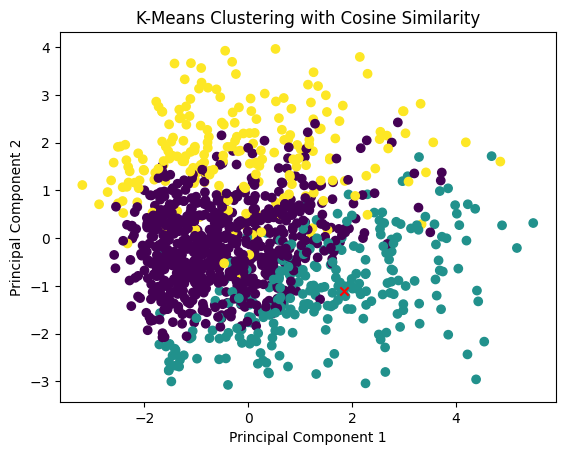

In [199]:
cosine_distances = pairwise_distances(arr, metric='cosine')
kmeans= KMeans(n_clusters=cluster_amount, init="k-means++", random_state=42, max_iter=100000)
kmeans.fit(cosine_distances)
# Get the cluster assignments
cluster_assignments = kmeans.labels_

# Reduce dimensionality using PCA for visualization (2D)
pca = PCA(n_components=2)
data_2d = pca.fit_transform(arr)
max_index = np.argmax(data_2d[:, 0])
min_ind=np.argmin(data_2d[:,0])
# Plot the results
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=cluster_assignments, cmap='viridis')
#plt.scatter(data_2d[0, 0], data_2d[0, 1], marker='x', color='red', label='purple')
plt.scatter(data_2d[26, 0], data_2d[26, 1], marker='x', color='red', label='green')
#plt.scatter(data_2d[11, 0], data_2d[11, 1], marker='x', color='red', label='yellow')
#plt.scatter(data_2d[min_ind, 0], data_2d[min_ind, 1], marker='x', color='red', label='Min PC1')
plt.title('K-Means Clustering with Cosine Similarity')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('clusterstriker.jpg')
plt.show()

In [197]:
cluster_lists[1]

[3,
 4,
 5,
 6,
 10,
 12,
 20,
 22,
 24,
 25,
 26,
 33,
 49,
 50,
 51,
 52,
 53,
 56,
 57,
 59,
 61,
 63,
 72,
 76,
 77,
 80,
 83,
 85,
 87,
 93,
 94,
 98,
 99,
 100,
 101,
 104,
 107,
 109,
 122,
 127,
 129,
 132,
 134,
 142,
 143,
 150,
 162,
 163,
 165,
 170,
 178,
 179,
 183,
 186,
 188,
 194,
 198,
 202,
 203,
 207,
 211,
 215,
 218,
 222,
 223,
 224,
 231,
 234,
 238,
 239,
 240,
 243,
 250,
 255,
 257,
 260,
 265,
 271,
 275,
 277,
 278,
 283,
 284,
 288,
 298,
 300,
 306,
 307,
 309,
 310,
 311,
 317,
 330,
 341,
 342,
 343,
 355,
 358,
 366,
 382,
 385,
 386,
 390,
 403,
 405,
 406,
 414,
 418,
 429,
 435,
 441,
 448,
 454,
 464,
 468,
 469,
 473,
 479,
 480,
 483,
 485,
 486,
 494,
 496,
 503,
 504,
 505,
 506,
 507,
 545,
 549,
 556,
 560,
 566,
 569,
 574,
 592,
 594,
 598,
 606,
 607,
 610,
 615,
 617,
 637,
 639,
 641,
 643,
 644,
 649,
 652,
 656,
 657,
 660,
 663,
 676,
 677,
 678,
 679,
 682,
 689,
 698,
 699,
 700,
 704,
 713,
 714,
 723,
 724,
 727,
 733,
 735,
 739,

In [185]:
cluster_lists = [[] for _ in range(5)]

# Populate lists with indices
for i, label in enumerate(cluster_assignments):
    cluster_lists[label].append(i)

meanarr=dfcalc.to_numpy()
for i in range(cluster_amount):

    selected_rows = meanarr[cluster_lists[i], :]

    selected_rows = dfcalc.iloc[cluster_lists[i]]

    # Calculate the mean of every column separately for the selected rows
    column_means = selected_rows.mean()

    print("Mean of every column separately:",i)
    print(column_means)

Mean of every column separately: 0
total.goals                    -0.029903
total.assists                   0.029342
total.shots                     0.013885
total.smartPasses               0.097045
total.keyPasses                 0.039058
total.successfulKeyPasses       0.035175
total.shotAssists               0.053869
total.recoveries                0.033698
total.opponentHalfRecoveries    0.018199
total.losses                   -0.055417
total.ownHalfLosses             0.002555
total.xgShot                   -0.032489
total.xgAssist                  0.053321
total.receivedPass              0.040615
total.touchInBox                0.014556
total.secondAssists             0.104628
total.thirdAssists             -0.010678
total.progressivePasses         0.050150
total.shotsOnTarget             0.014348
dtype: float64
Mean of every column separately: 1
total.goals                     0.136657
total.assists                  -0.071072
total.shots                     0.120512
total.smartPa

c:\Users\Rui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\Rui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\Rui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\Rui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\Rui\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1366: FutureWarning: algorithm

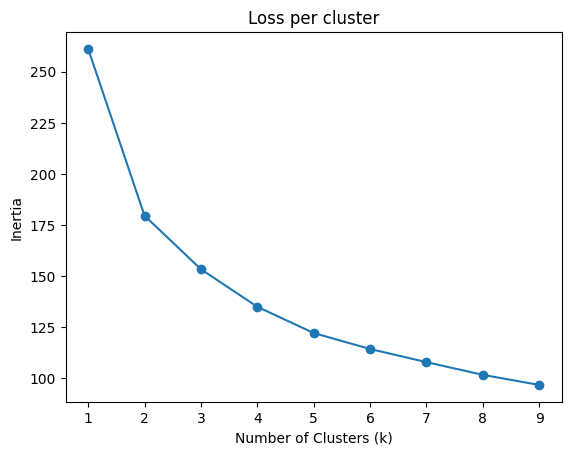

In [167]:
k_values = range(1, 10)

# Calculate and store the inertia for each k
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    cosine_distances = pairwise_distances(arr, metric='cosine')
    kmeans.fit(cosine_distances)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Loss per cluster')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.savefig('elbowstriker.jpg')
plt.show()

In [72]:
# Manually set the initial centroids using points with indices 18 and 63
indices_for_initial_centroids = [0, 63]

# Extract data points for initial centroids
initial_centroids = cosine_distances[indices_for_initial_centroids]

# Fit KMeans with manually initialized centroids
kmeans = KMeans(n_clusters=2, init=initial_centroids, n_init=1, random_state=42)
kmeans.fit(cosine_distances)

# Get cluster assignments and centroids
cluster_assignments = kmeans.labels_
final_centroids = kmeans.cluster_centers_